In [1]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import pandas as pd
from zipfile import ZipFile # Required module
file_name = "C:/Users/NTANDO/Downloads/A_NEWLY_HIRED_DATA_ANALYST.zip"

with ZipFile(file_name, 'r') as zip:
    zip.printdir()
    
    # Extract all files now
    print('Extracting all the files now...')
    zip.extractall()
    
    print('Done!')

data = pd.read_csv("C:/Users/NTANDO/Documents/Data Insight/A_NEWLY_HIRED_DATA_ANALYST/RTRA_Employ_4NAICS_16_20.csv")

File Name                                             Modified             Size
A_NEWLY_HIRED_DATA_ANALYST/                    2020-08-14 14:46:52            0
A_NEWLY_HIRED_DATA_ANALYST/NAICS-2017 - Statistics-Canada.pdf 2020-08-14 14:46:36      2681901
A_NEWLY_HIRED_DATA_ANALYST/LMO_Detailed_Industries_by_NAICS.xlsx 2020-08-14 14:43:34        12209
A_NEWLY_HIRED_DATA_ANALYST/RTRA_Employ_4NAICS_97_99.csv 2020-08-14 14:43:34       198820
A_NEWLY_HIRED_DATA_ANALYST/RTRA_Employ_4NAICS_06_10.csv 2020-08-14 14:43:34       333616
A_NEWLY_HIRED_DATA_ANALYST/RTRA_Employ_2NAICS_06_10.csv 2020-08-14 14:43:34        62238
A_NEWLY_HIRED_DATA_ANALYST/RTRA_Employ_3NAICS_11_15.csv 2020-08-14 14:43:34       331302
A_NEWLY_HIRED_DATA_ANALYST/RTRA_Employ_2NAICS_00_05.csv 2020-08-14 14:43:34        74626
A_NEWLY_HIRED_DATA_ANALYST/RTRA_Employ_2NAICS_11_15.csv 2020-08-14 14:43:34        62239
A_NEWLY_HIRED_DATA_ANALYST/RTRA_Employ_2NAICS_16_20.csv 2020-08-14 14:43:34        46927
A_NEWLY_HIRED_DATA_ANALY

In [2]:
#Accessing the files
the_2NAICS = glob.glob('C:/Users/NTANDO/Documents/Data Insight/A_NEWLY_HIRED_DATA_ANALYST/*2NAICS*')
the_3NAICS = glob.glob('C:/Users/NTANDO/Documents/Data Insight/A_NEWLY_HIRED_DATA_ANALYST/*3NAICS*')
the_4NAICS = glob.glob('C:/Users/NTANDO/Documents/Data Insight/A_NEWLY_HIRED_DATA_ANALYST/*4NAICS*')
the_2NAICS # the list of files

['C:/Users/NTANDO/Documents/Data Insight/A_NEWLY_HIRED_DATA_ANALYST\\RTRA_Employ_2NAICS_00_05.csv',
 'C:/Users/NTANDO/Documents/Data Insight/A_NEWLY_HIRED_DATA_ANALYST\\RTRA_Employ_2NAICS_06_10.csv',
 'C:/Users/NTANDO/Documents/Data Insight/A_NEWLY_HIRED_DATA_ANALYST\\RTRA_Employ_2NAICS_11_15.csv',
 'C:/Users/NTANDO/Documents/Data Insight/A_NEWLY_HIRED_DATA_ANALYST\\RTRA_Employ_2NAICS_16_20.csv',
 'C:/Users/NTANDO/Documents/Data Insight/A_NEWLY_HIRED_DATA_ANALYST\\RTRA_Employ_2NAICS_97_99.csv']

In [3]:
# Accessing the datasets in files
def access_datasets(data_paths):
    df = pd.DataFrame()
    for path_ in data_paths:
        df = pd.concat([df,pd.read_csv(path_)])
    return df

data_2NAICS = access_datasets(the_2NAICS)
data_3NAICS = access_datasets(the_3NAICS)
data_4NAICS = access_datasets(the_4NAICS)

In [4]:
industries_data = pd.ExcelFile("C:/Users/NTANDO/Documents/Data Insight/A_NEWLY_HIRED_DATA_ANALYST/LMO_Detailed_Industries_by_NAICS.xlsx")
industries_data = industries_data.parse(0)
industries_data['NAICS'] = industries_data['NAICS'].replace(regex='&', value=',')
industries_data['NAICS'] = industries_data['NAICS'].astype('str')
industries_data.head()

,LMO_Detailed_Industry,NAICS
0,Farms,"111 , 112"
1,"Fishing, hunting and trapping",114
2,Forestry and logging,113
3,Support activities for agriculture and forestry,115
4,Oil and gas extraction,211


In [5]:
data_output = pd.ExcelFile("C:/Users/NTANDO/Documents/Data Insight/A_NEWLY_HIRED_DATA_ANALYST/Data_Output_Template.xlsx")
data_output = data_output.parse(0)
data_output = data_output.fillna(0)
data_output.head()

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
0,1997,1,Accommodation services,0.0
1,1997,1,Air transportation,0.0
2,1997,1,Ambulatory health care services,0.0
3,1997,1,"Amusement, gambling and recreation industries",0.0
4,1997,1,"Architectural, engineering and related services",0.0


In [6]:
def cut(df):  
    df1=pd.DataFrame(df.NAICS.astype('str').str.split('[').to_list(), columns=['NAICS','NAICS_CODE'])
    df1['NAICS_CODE']= df1.NAICS_CODE.astype('str').str.strip(']').str.replace('-',',')
    df['NAICS']=df1['NAICS']
    df['NAICS_CODE']= df1['NAICS_CODE']
    return df

data_2NAICS = cut(data_2NAICS)
data_2NAICS.sort_values(by=["SYEAR", "SMTH"])

#left merging the df_2_naics with lmo_detailed_industries 
df1=data_2NAICS.merge(industries_data, left_on='NAICS_CODE', 
                     right_on='NAICS', how='left').drop(columns=['NAICS_x','NAICS_y'],axis=1)
df1.tail(10)

def format_date(df):
  df['date'] = pd.to_datetime(df.SYEAR.astype('str') + df.SMTH.astype('str'), format='%Y%m')
  df2 = df.sort_values('date')
  return df2

df1 = format_date(df1).dropna()
df1.head(4)

,SYEAR,SMTH,_EMPLOYMENT_,NAICS_CODE,LMO_Detailed_Industry,date
4771,1997,1,72000,41,Wholesale trade,1997-01-01
4770,1997,1,9750,22,Utilities,1997-01-01
4767,1997,1,50750,53,Real estate rental and leasing,1997-01-01
4764,1997,1,89250,81,"Repair, personal and non-profit services",1997-01-01


In [7]:
# Sorting the 3 digits
def cut(df):  
    df1=pd.DataFrame(df.NAICS.astype('str').str.split('[').to_list(), columns=['NAICS','NAICS_CODE'])
    df1['NAICS_CODE']= df1.NAICS_CODE.astype('str').str.strip(']').str.replace('-',',')
    df['NAICS']=df1['NAICS']
    df['NAICS_CODE']= df1['NAICS_CODE']
    return df

data_3NAICS = cut(data_3NAICS)
data_3NAICS.sort_values(by=["SYEAR", "SMTH"])

df2=data_3NAICS.merge(industries_data, left_on='NAICS_CODE', 
                     right_on='NAICS', how='left').drop(columns=['NAICS_x','NAICS_y'],axis=1)
df2.tail(10)

def format_date(df):
  df['date'] = pd.to_datetime(df.SYEAR.astype('str') + df.SMTH.astype('str'), format='%Y%m')
  df2 = df.sort_values('date')
  return df2

df2 = format_date(df2).dropna()
df2.head(4)

,SYEAR,SMTH,_EMPLOYMENT_,NAICS_CODE,LMO_Detailed_Industry,date
24504,1997,1,8000,331,Primary metal manufacturing,1997-01-01
24508,1997,1,109750,912,Provincial and territorial public administration,1997-01-01
24495,1997,1,3000,322,Paper manufacturing,1997-01-01
24492,1997,1,27250,211,Oil and gas extraction,1997-01-01


In [8]:
for i in range(len(industries_data)):
    industries_data.at[i, 'NAICS'] = industries_data.at[i, 'NAICS'].split(',')

industries_data = industries_data.explode('NAICS')
industries_data.head(4)
industries_data['NAICS'] = industries_data.NAICS.astype(int)

In [9]:
# Merging
df3 = data_4NAICS.merge(industries_data, on="NAICS", how = 'inner')

format_date(df3)
df3.sort_values(by= "date")
df3.columns = ['SYEAR', 'SMTH', 'NAICS_CODE', '_EMPLOYMENT_', 'LMO_Detailed_Industry', 'date']
df3.head()


,SYEAR,SMTH,NAICS_CODE,_EMPLOYMENT_,LMO_Detailed_Industry,date
0,2000,1,3361,1000,Transportation equipment manufacturing (exclud...,2000-01-01
1,2000,2,3361,750,Transportation equipment manufacturing (exclud...,2000-02-01
2,2000,3,3361,1250,Transportation equipment manufacturing (exclud...,2000-03-01
3,2000,4,3361,500,Transportation equipment manufacturing (exclud...,2000-04-01
4,2000,5,3361,2000,Transportation equipment manufacturing (exclud...,2000-05-01


In [10]:
# Merging 3 dataframes
data = pd.concat([df1, df2, df3])
data = data.dropna()
data.sort_values(by= "date")
data.columns = ['SYEAR', 'SMTH', 'EMPLOYMENT', 'NAICS_CODE', 'LMO_Detailed_Industry', 'date']
data = data[data['SYEAR'] <= 2018]
data

,SYEAR,SMTH,EMPLOYMENT,NAICS_CODE,LMO_Detailed_Industry,date
4771,1997,1,72000,41,Wholesale trade,1997-01-01
4770,1997,1,9750,22,Utilities,1997-01-01
4767,1997,1,50750,53,Real estate rental and leasing,1997-01-01
4764,1997,1,89250,81,"Repair, personal and non-profit services",1997-01-01
4756,1997,1,118000,23,Construction,1997-01-01
...,...,...,...,...,...,...
6343,1999,8,1750,6117,Private and trades education,1999-08-01
6344,1999,9,2000,6117,Private and trades education,1999-09-01
6345,1999,10,1250,6117,Private and trades education,1999-10-01
6346,1999,11,1750,6117,Private and trades education,1999-11-01


[Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Employment'),
 Text(0.5, 1.0, 'Employment in the construction industry 1997-2018')]

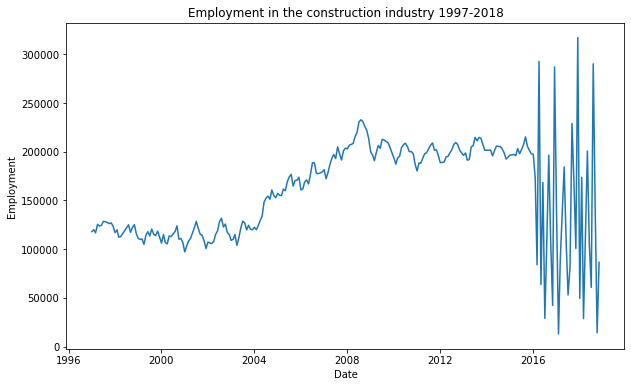

In [11]:
#Subsetting the construction data
construction = data[data['LMO_Detailed_Industry']== "Construction"]


plt.figure(figsize = (10,6))
ax = sns.lineplot(x = "date", y = "EMPLOYMENT",
             data = construction)
ax.set(xlabel= "Date", ylabel="Employment", title= "Employment in the construction industry 1997-2018")

[Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Employment'),
 Text(0.5, 1.0, 'Employment in the construction industry')]

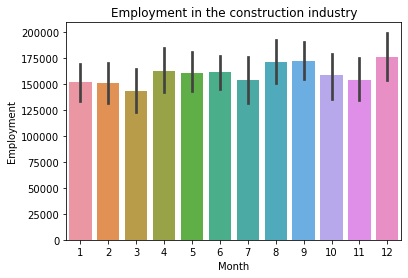

In [12]:
# barplot
ax = sns.barplot(y= 'EMPLOYMENT', x= 'SMTH', data= construction)
ax.set(xlabel="Month", ylabel = "Employment", title= "Employment in the construction industry")

<AxesSubplot:xlabel='date', ylabel='EMPLOYMENT'>

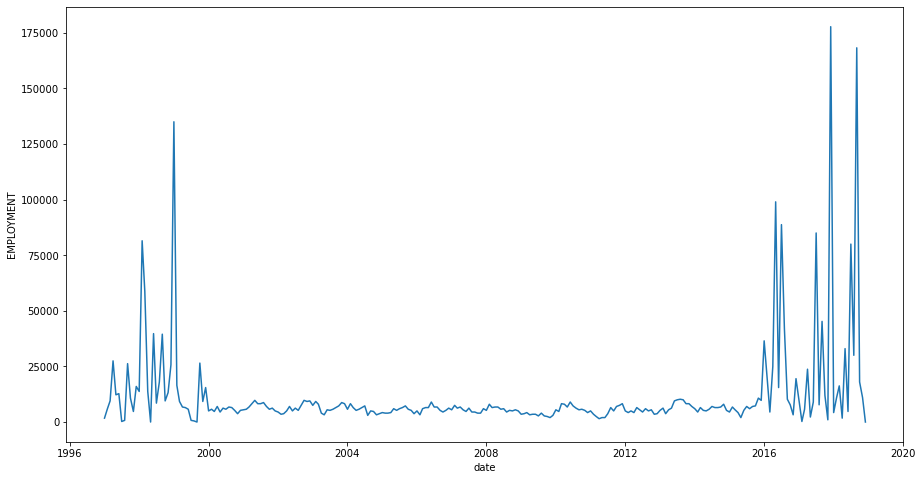

In [13]:
# Subsetting Water Transport
water_data =data[(data['LMO_Detailed_Industry']== "Water transportation")]
plt.figure(figsize = (15,8))
sns.lineplot(x = "date", y = "EMPLOYMENT",
             data = water_data)

[Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Employment'),
 Text(0.5, 1.0, 'Employment in the water transport industry')]

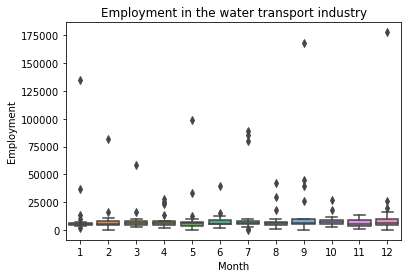

In [14]:
# Box Plot
ax = sns.boxplot(y= 'EMPLOYMENT', x= 'SMTH', data= water_data)
ax.set(xlabel="Month", ylabel = "Employment", title="Employment in the water transport industry")

[Text(0.5, 0, 'Total Employment'),
 Text(0, 0.5, 'Industries'),
 Text(0.5, 1.0, 'Employment across industries 1997-2018')]

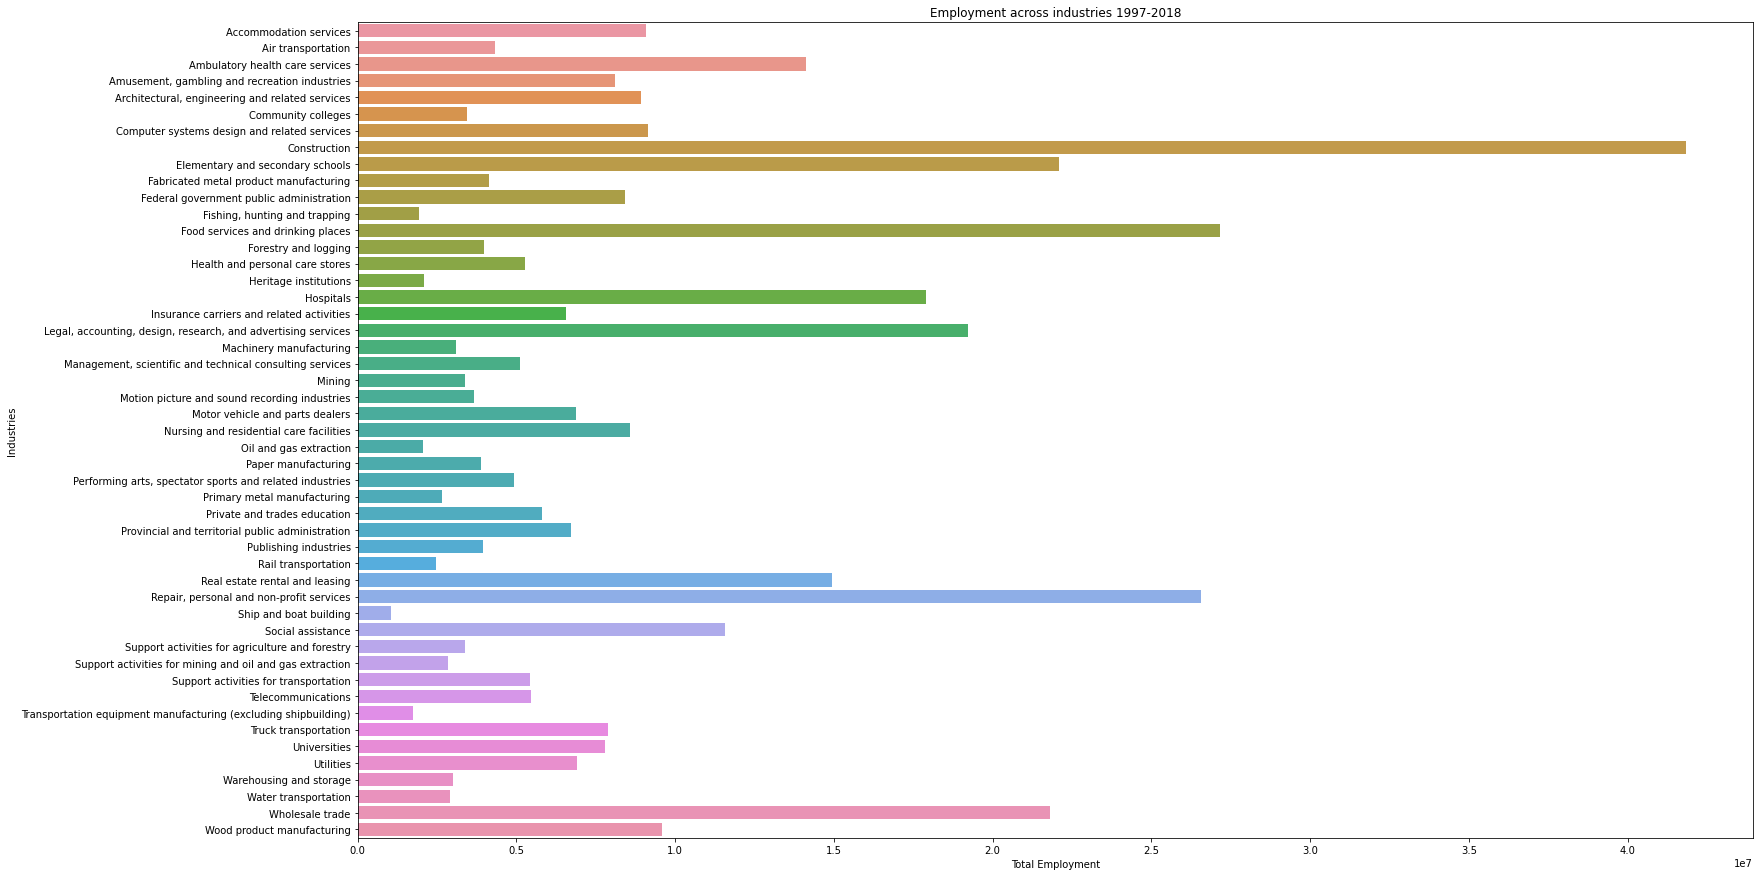

In [15]:
# Plot for all industries
grouped_data = data.groupby('LMO_Detailed_Industry').agg(Employment= ('EMPLOYMENT', 'sum'))
grouped_data = pd.DataFrame(grouped_data)
plt.figure(figsize = (25,15))
ax=sns.barplot(x='Employment',y=grouped_data.index,data=grouped_data,orient ='h')
ax.set(xlabel="Total Employment", ylabel = "Industries", title="Employment across industries 1997-2018")